In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# the specific implementation of the violin plot below requires matplotlib version 3.9 or newer
# pip install matplotlib==3.9
matplotlib.__version__

'3.9.0'

## Exercise 4.1

In [3]:
data = pd.read_csv('population_us.csv')
data

year  age  sex   people
0    1850    0    1  1483789
1    1850    0    2  1450376
2    1850    5    1  1411067
3    1850    5    2  1359668
4    1850   10    1  1260099
..    ...  ...  ...      ...
565  2000   80    2  3221898
566  2000   85    1   970357
567  2000   85    2  1981156
568  2000   90    1   336303
569  2000   90    2  1064581

[570 rows x 4 columns]

In [4]:
# The standard Seaborn violin plot function takes in unweighted datapoints. 
# On the dataset "data" above, it would only see 
# "there is exactly one datapoint for the year x, age y, sex z for any given x, y, z"
# and would plot a uniformly thick violin plot for each year.
# It can not tell that the value "people" indicates a weight.
#
# To trick it, we create a dataset containing many entries for any given year, age and sex, 
# proportionally to the number of people in that sex and age group in the given year.

violin_data = []
for name, values in data.groupby(['year', 'age', 'sex']):
    violin_data.extend([name] * int(values['people'].values[0] * 1e-5))
violin_data = pd.DataFrame(violin_data, columns=['year', 'age', 'sex']).replace({1: 'male', 2: 'female'})
violin_data

year  age     sex
0      1850    0    male
1      1850    0    male
2      1850    0    male
3      1850    0    male
4      1850    0    male
...     ...  ...     ...
19256  2000   90  female
19257  2000   90  female
19258  2000   90  female
19259  2000   90  female
19260  2000   90  female

[19261 rows x 3 columns]

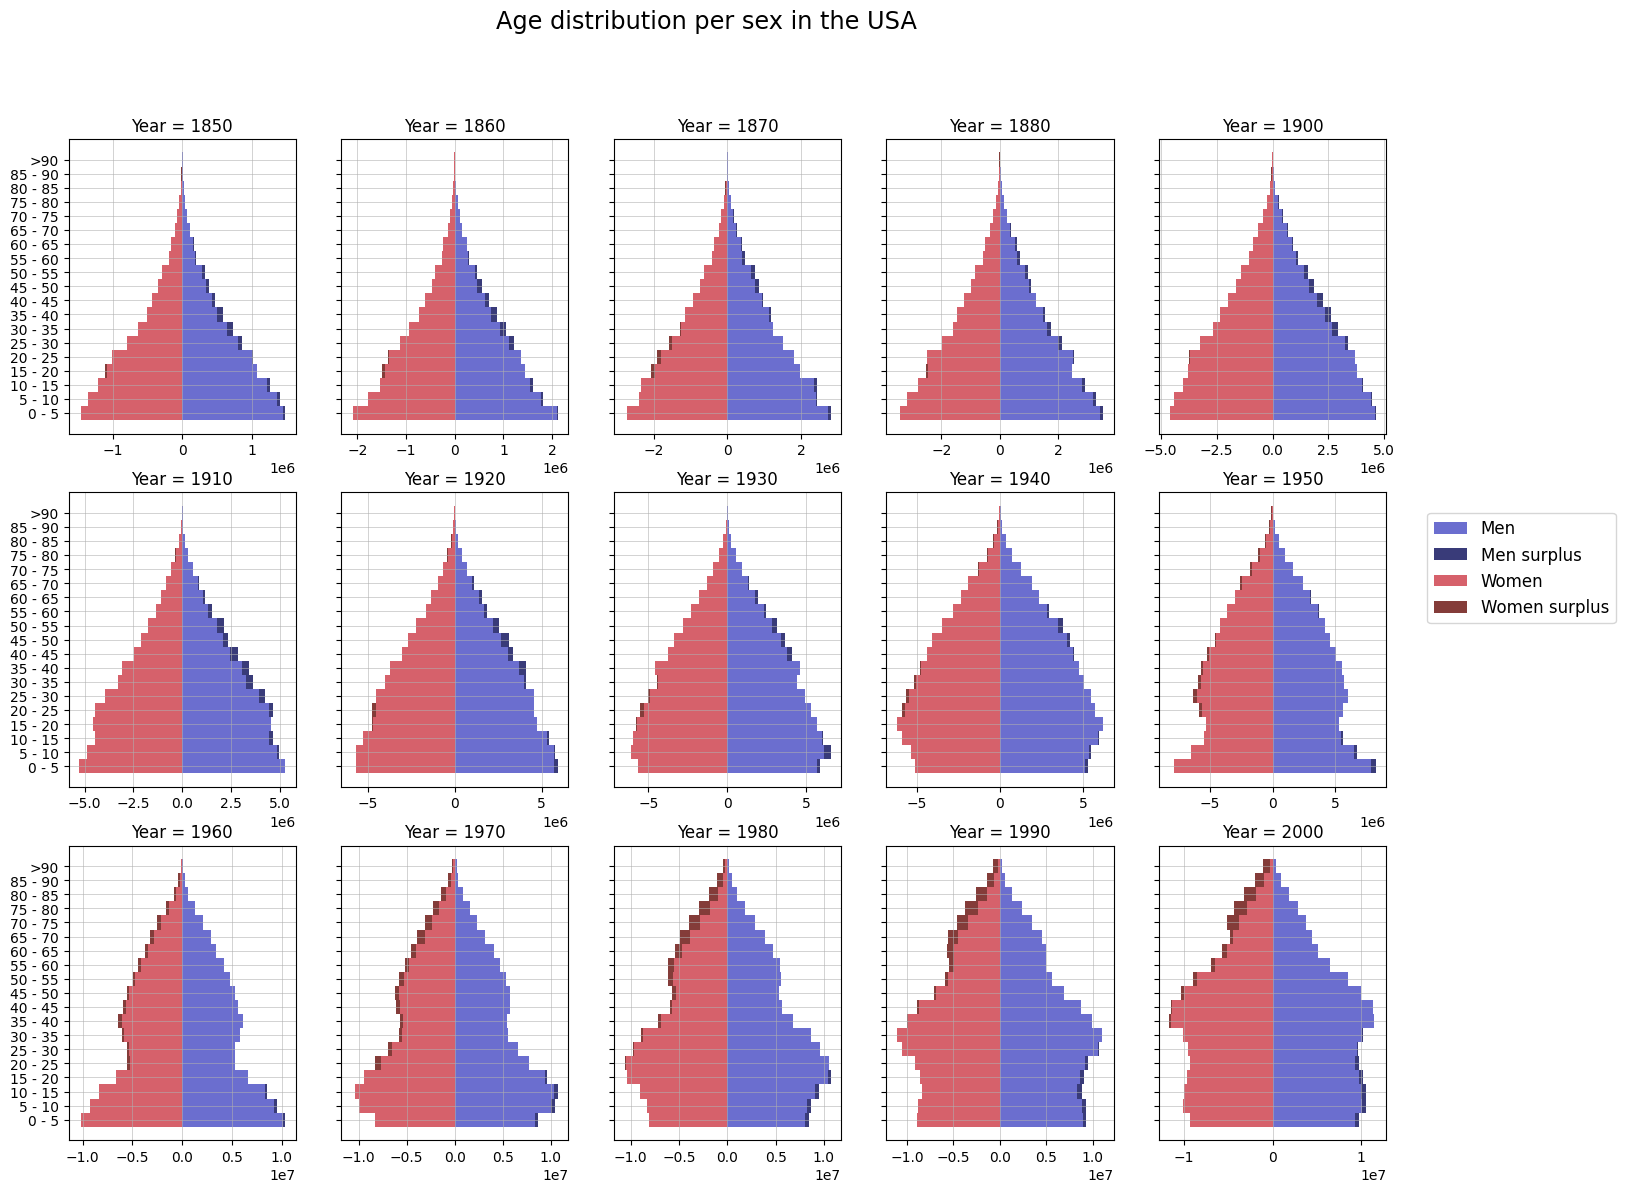

In [5]:
# Clear plot for comparison of the whole population distribution over time.
# Male / female ratio can be clearly seen in here as well.
# Downside: Creating the plot is rather hard.

age_range = [f"{i} - {i+5}" if i < 90 else ">90" for i in range(0, 91, 5)]
fig, axs = plt.subplots(3, 5, figsize = (17,13))
for i, year in enumerate(data['year'].unique()):
    df_temp = data[data["year"] == year]
    men_num = df_temp[df_temp["sex"] == 1]["people"].to_numpy()
    women_num = df_temp[df_temp["sex"] == 2]["people"].to_numpy()
    min_num = np.minimum(men_num, women_num)
    ax = axs[int(i/5), i % 5]
    ax.barh(age_range, min_num, height = 1, color=plt.cm.tab20b(2), label="Men")
    ax.barh(age_range, men_num-min_num, height = 1, left = min_num,
    color=plt.cm.tab20b(0), label="Men surplus")
    ax.barh(age_range, -min_num, height = 1, color=plt.cm.tab20b(14), label="Women")
    ax.barh(age_range, min_num-women_num, height = 1, left = -min_num,
    color=plt.cm.tab20b(12), label="Women surplus")
    ax.set_title(f"Year = {year}")
    if i % 5 != 0:
        ax.set_yticklabels([])
    ax.grid(linewidth=0.4)
    ax.set_xlim(-df_temp["people"].max() * 1.1, df_temp["people"].max() * 1.1)
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center right", fontsize = "large",bbox_to_anchor = (1.04, 0.55))
fig.suptitle("Age distribution per sex in the USA", fontsize = "xx-large")
plt.show()

## Other possible ways to approach Exercise 4.1

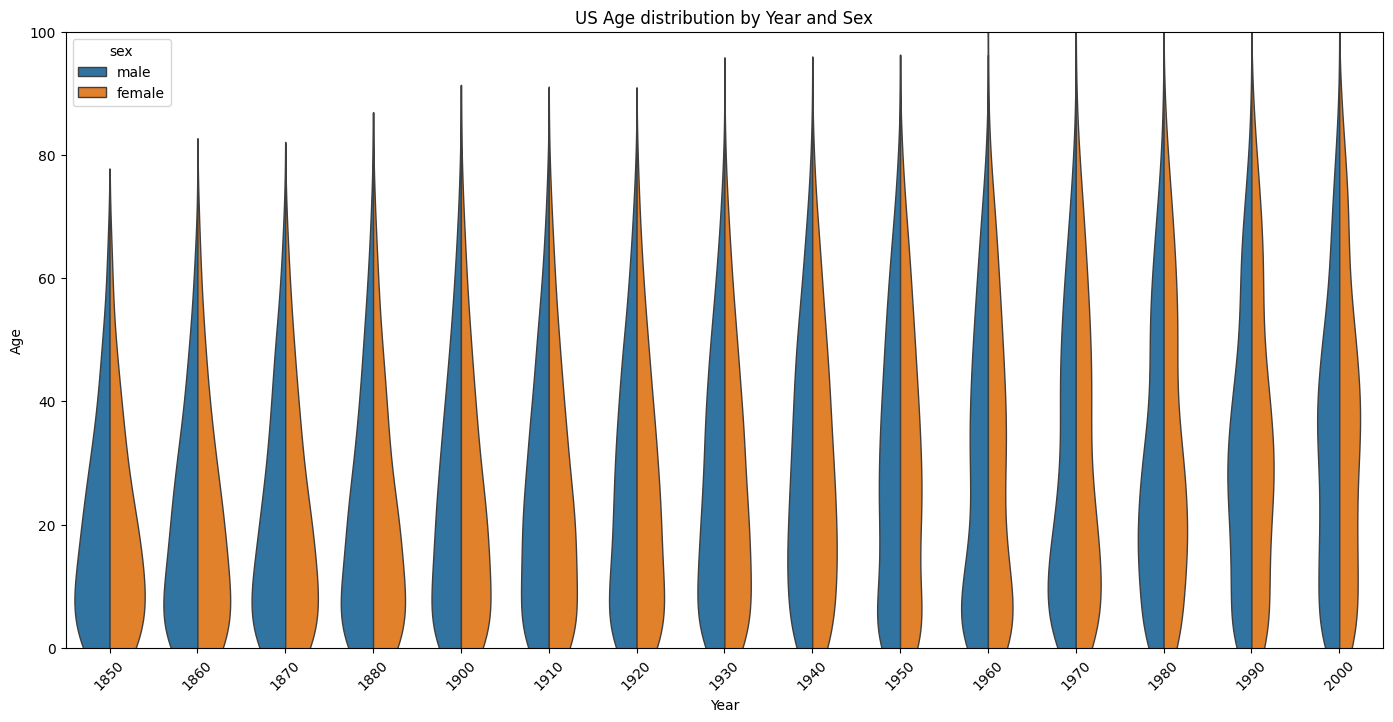

In [6]:
plt.figure(figsize=(17, 8))
sns.violinplot(x='year', y='age', hue='sex', data=violin_data, split=True, inner=None, linewidth=1)#, density_norm="count")

plt.ylim((0,100))
plt.title('US Age distribution by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# By using density_norm = "count" in the sns.violinplot, one can make the area of the violin proportional to the overall population in the given year.
# As the population before 1900 was so much smaller than today, the violins for the early years become almost unreadable though.

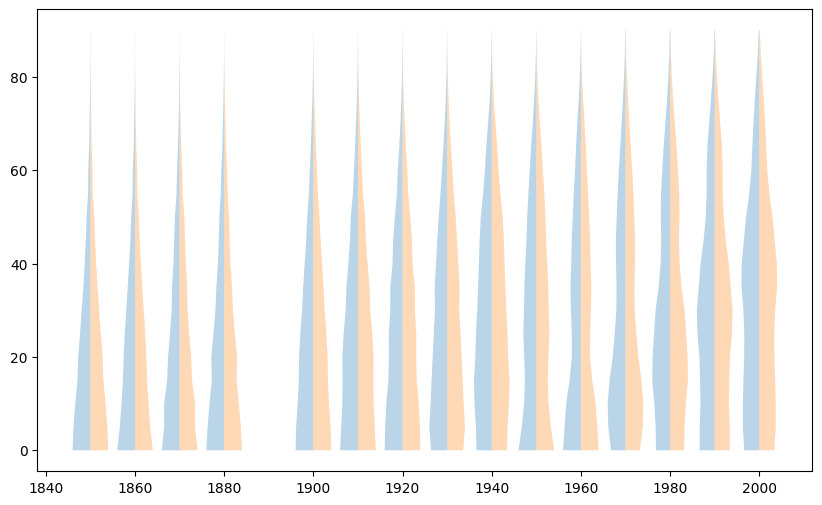

In [7]:
# Attempt at creating a violin plot from the original dataset rather than creating the "individual person" dataset first
# This is somehow way more tedious and it is hard to add outlines 


dictlistmale = []
dictlistfemale = []

years = sorted(data['year'].unique())
ages = sorted(data['age'].unique())

for year in years:
    
    age_distr_male = data[(data['year'].values==year) & (data['sex'].values==1)]['people'].values
    age_distr_female = data[(data['year'].values==year) & (data['sex'].values==2)]['people'].values
    
    dictyear_male = {'coords': ages,
                'vals': age_distr_male,
                'mean': None,
                'median': None,
                'min': None,
                'max': None
               }
    
    dictyear_female = {'coords': ages,
                'vals': age_distr_male,
                'mean': None,
                'median': None,
                'min': None,
                'max': None
               }

    dictlistmale.append(dictyear_male)
    dictlistfemale.append(dictyear_female)
    

fig, axs = plt.subplots(figsize=(10,6))

axs.violin(dictlistmale,positions=years,widths=8,showmeans=False,showextrema=False,showmedians=False,side='low')
axs.violin(dictlistfemale,positions=years,widths=8,showmeans=False,showextrema=False,showmedians=False,side='high')
fig.show()

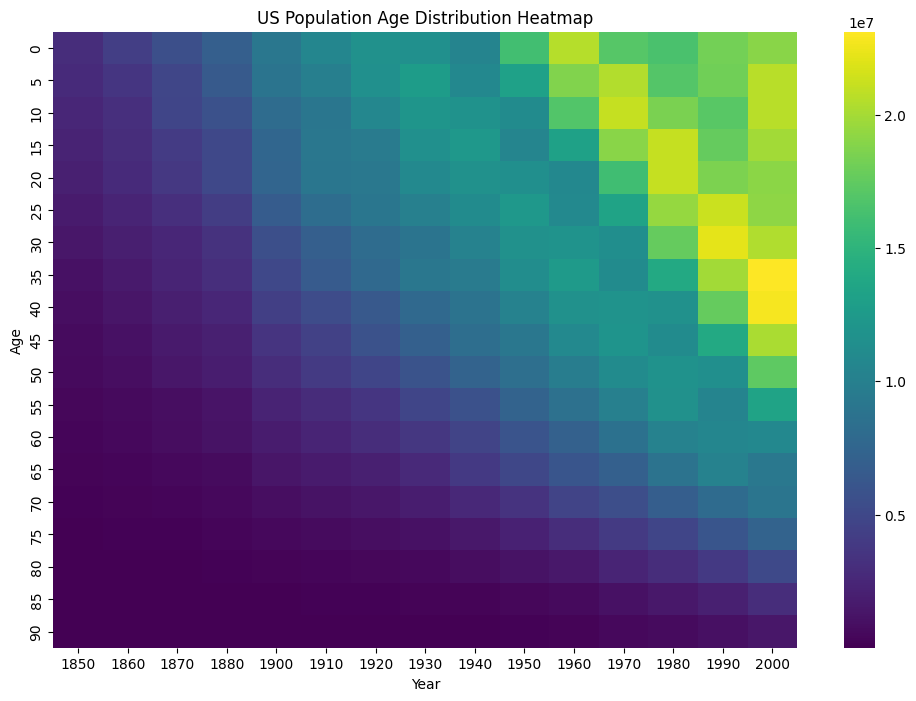

In [8]:
# A heatmap with year and age axes makes it easy to track cohorts through time (following diagonal stripes in the plot.
# For instance, one can quite clearly see the "baby boomers" born in the 50s and 60s

# pivot table for the heatmap
age_heatmap = data.pivot_table(index='age', columns='year', values='people', aggfunc='sum')

# heatmap to visualize age distribution over time
plt.figure(figsize=(12, 8))
sns.heatmap(age_heatmap, cmap='viridis', annot=False, cbar=True)
plt.title('US Population Age Distribution Heatmap')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()


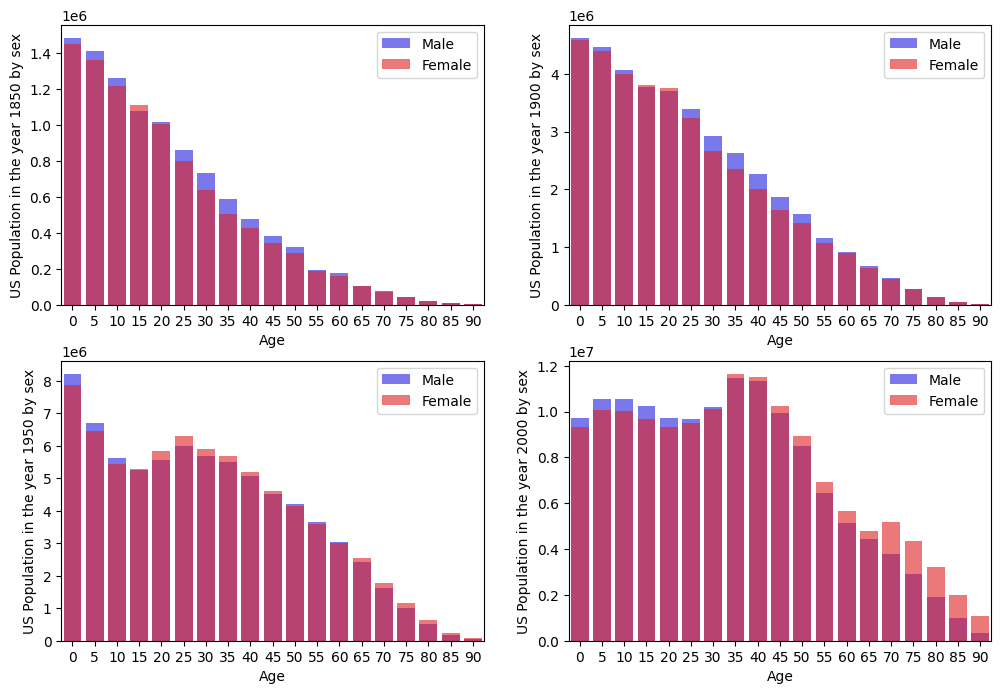

In [9]:
# This barplot is a simple way to plot the population distribution in age and sex. 
# The use of the alpha channel creates the effect of a stacked bar chart through overlapping of colors.
# Small caution note: 
# The colors don't match with the ones from the first figure in the sample solutions above, and the overlap is not explained in the legend.

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

plot_years = [1850,1900,1950,2000]

for ax, year in zip(axs.flatten(),plot_years):
    # Filtered data for males and females
    males = data[(data['sex'] == 1) & (data['year'] == year)]
    females = data[(data['sex'] == 2) & (data['year'] == year)]
    
    # side-by-side bar plot to compare male and female distributions
    sns.barplot(data=males, x='age', y='people', label='Male', color='b', alpha=0.6, ax=ax)
    sns.barplot(data=females, x='age', y='people', label='Female', color='r', alpha=0.6, ax=ax)
    ax.legend()
    ax.set_xlabel('Age')
    ax.set_ylabel('US Population in the year '+str(year)+' by sex')

fig.show()


## Exercise 4.2.1

In [10]:
# Define the vertices of the unit cube
points = np.array([
    [0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1],
    [1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1]
], dtype=np.double)

# Define the triangles to triangulate the cube surface
triangles = np.array([
    [0, 1, 2], [0, 2, 3],  # Front face
    [1, 5, 6], [1, 6, 2],  # Right face
    [5, 4, 7], [5, 7, 6],  # Back face
    [4, 0, 3], [4, 3, 7],  # Left face
    [3, 2, 6], [3, 6, 7],  # Top face
    [0, 4, 5], [0, 5, 1]   # Bottom face
], dtype=int)

# Define colors for each triangle for better visibility of their alignment
colors = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff', '#ff8000', '#8000ff', '#0080ff', '#80ff00', '#ff0080', '#008080']


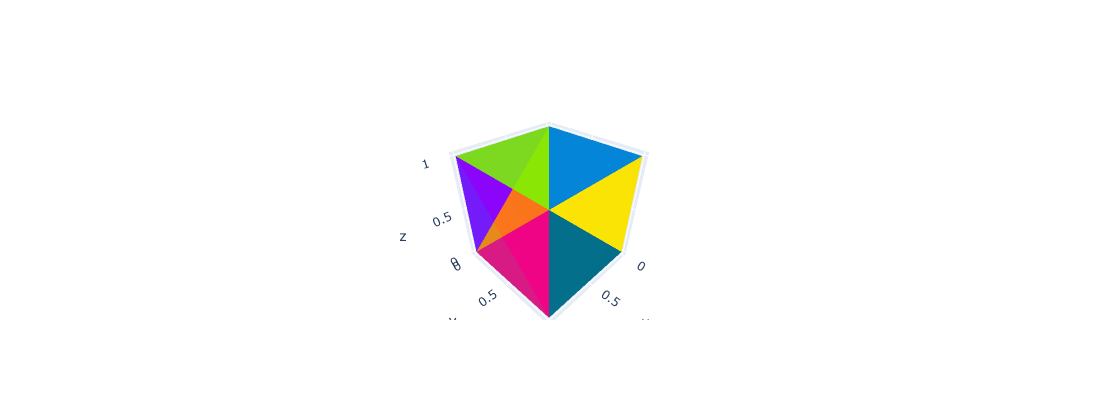

In [11]:
# Plot each triangle separately with its own color to more easily see their orientation
fig = go.Figure()
for i, triangle in enumerate(triangles):
    fig.add_trace(go.Mesh3d(
        x=points[triangle, 0], 
        y=points[triangle, 1], 
        z=points[triangle, 2],
        i=[0, 1, 2],
        j=[1, 2, 0],
        k=[2, 0, 1],
        color=colors[i],
        opacity=0.5
    ))

fig.update_layout(height=400, scene=dict(aspectratio=dict(x=1, y=1, z=1)))
fig.show()


## Exercise 4.2.2

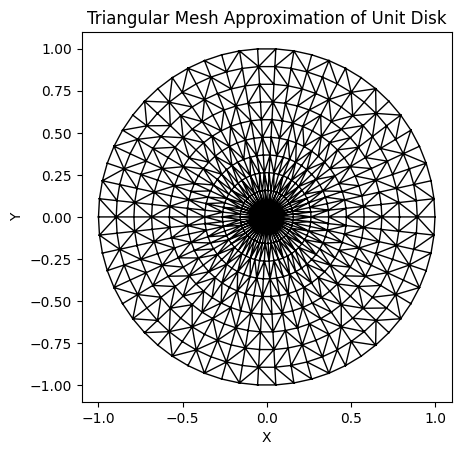

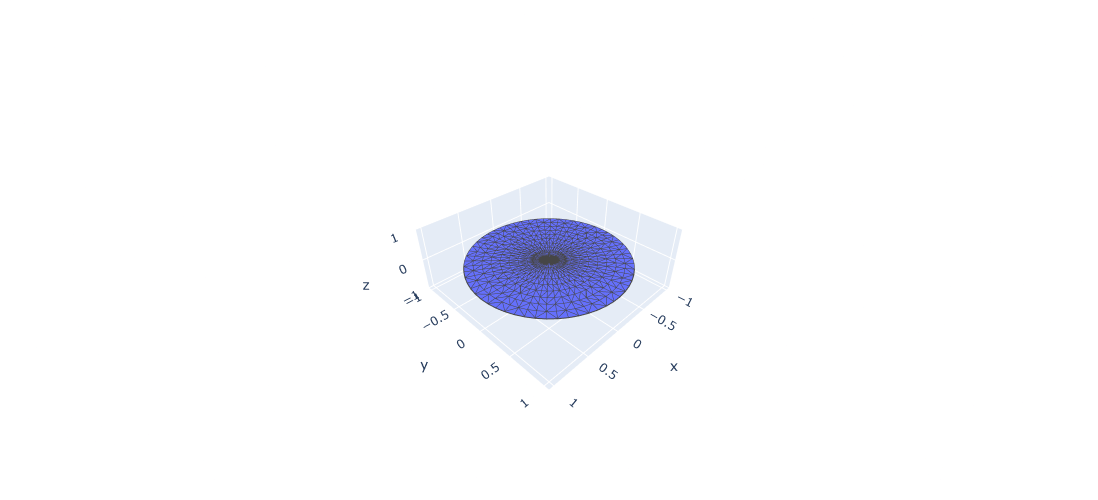

In [12]:
import matplotlib.tri as mtri

# Generate parametrization of a flat rectangle
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-1, 1, 20)  # Change the range to cover the entire disk
w, theta = np.meshgrid(w, theta)

# Convert the parametrization to Cartesian coordinates
x = w * np.cos(theta)
y = w * np.sin(theta)
z = np.zeros_like(x)  # z-coordinate is zero

# Create the triangulation
tri = mtri.Triangulation(np.ravel(x), np.ravel(y))

# Sanity check: visualize the triangulation
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(tri, color="k", lw=1)
plt.title('Triangular Mesh Approximation of Unit Disk')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Plotting the mesh lines sometimes helps to make things clearer, not built in with plotly.
# Use this workaround: https://community.plotly.com/t/show-edges-of-the-mesh-in-a-mesh3d-plot/33614/3

def plotMeshPlotly(points,triangles):
    tri_points=points[triangles]
    Xe = []
    Ye = []
    Ze = []
    for T in tri_points:
        Xe.extend([T[k%3][0] for k in range(4)]+[ None])
        Ye.extend([T[k%3][1] for k in range(4)]+[ None])
        Ze.extend([T[k%3][2] for k in range(4)]+[ None])
       
    #define the trace for triangle sides
    lines = go.Scatter3d(
                       x=Xe,
                       y=Ye,
                       z=Ze,
                       mode='lines',
                       name='',
                       line=dict(color= 'rgb(70,70,70)', width=2)) 

    mesh=go.Mesh3d(x=points[:,0],y=points[:,1],z=points[:,2],i=triangles[:,0],j=triangles[:,1],k=triangles[:,2])
    
    fig = go.Figure(data=[mesh,lines],layout={"height":500,"scene":{"aspectratio":{"x":1,"y":1,"z":.4}}})
    fig.show()

# Reshape points for Plotly
points = np.stack([x.flatten(), y.flatten(), z.flatten()], axis=-1)

# Call the function with points and triangles
plotMeshPlotly(points, tri.triangles)

## Exercise 4.2.3

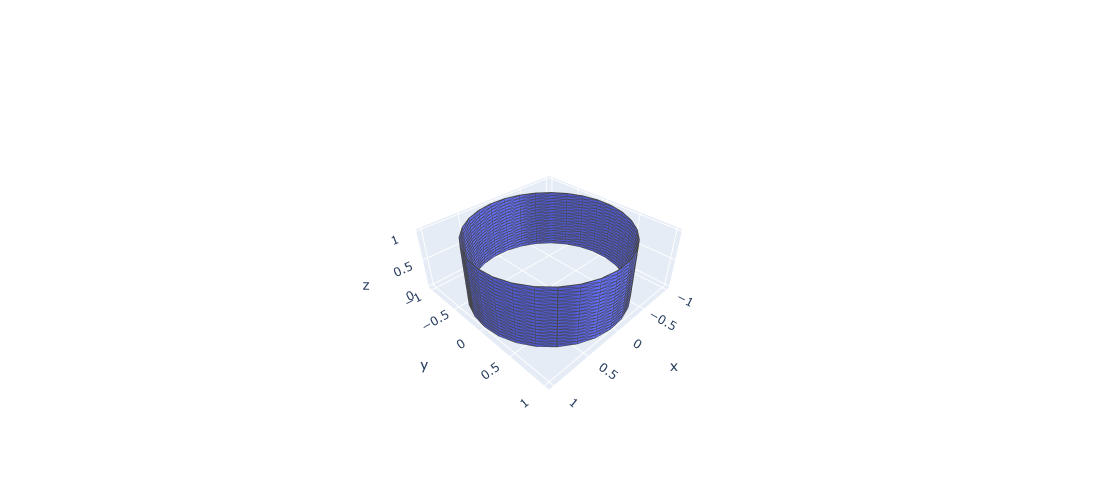

In [13]:
# Generate parametrization of a cylinder
theta = np.linspace(0, 2 * np.pi, 30)  # Parameter along the circle
z = np.linspace(0, 1, 20)  # Parameter along the height
theta, z = np.meshgrid(theta, z)

# Convert parametrization to Cartesian coordinates
x = np.cos(theta)
y = np.sin(theta)

# Flatten arrays for use in triangulation
x_flat = np.ravel(x)
y_flat = np.ravel(y)
z_flat = np.ravel(z)

# Create indices for the triangles in the mesh
length_theta = theta.shape[1]
length_z = z.shape[0]

triangles = []
for i in range(length_z - 1):
    for j in range(length_theta - 1):
        idx = i * length_theta + j
        triangles.append([idx, idx + 1, idx + length_theta])
        triangles.append([idx + 1, idx + 1 + length_theta, idx + length_theta])

# Triangles is a list of vertex indices that make up the triangles
triangles = np.array(triangles)
points = np.vstack((x_flat, y_flat, z_flat)).T

plotMeshPlotly(points, triangles)
